Encapsulation in Python - Database Management - Group 5

Carl Humbs 500927977
Dide Uzun 500923796
Bart Remmers 500777595
Pip Velthuijs 500831930

Master Digital Driven Business
Mr. Pinosio & Mr. Situmeang
September 21, 2023

The first lines of codes are written by everyone

In [300]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [301]:
#connecting python to the database 
conn = psycopg2.connect(
database = "Database Management",
user = "postgres",
password = "Kaas1234",
host = "localhost",  
port = "5432")

In [302]:
#creating a cursor that allows us to interact with the database using SQL commands
cur = conn.cursor()

RQ1:To what extent does graphic content (violence, explicit language, and explicit sex) influence a movie's performance in terms of box office sales? 

This code is written by Bart Remmers

In [303]:
#Making sure the query work in Python, should return the same results as in SQL, it does, BR
query = """SELECT AVG(s.worldwide_box_office) AS average_worldwide_box_office, mc.rating
FROM public."Sales" s
LEFT JOIN public."MetaClean" mc
ON s."MovieID" = mc."MovieID"
WHERE mc."MovieID" IS NOT NULL
GROUP BY mc.rating;"""

df = pd.read_sql(query, conn)

print(df)

rating_summary = df.groupby('rating')['average_worldwide_box_office'].describe() 
print(rating_summary)

    average_worldwide_box_office      rating
0                   5.633542e+06        None
1                   1.164707e+07       TV-MA
2                   1.372470e+08       PG-13
3                   1.075998e+05          NR
4                   3.058871e+07       TV-PG
5                   4.734072e+08        TV-G
6                   1.875566e+08           G
7                   1.014959e+08       TV-14
8                   2.720462e+07       NC-17
9                   3.275846e+06        Open
10                  1.116662e+07      PG--13
11                  4.616178e+07           R
12                  1.560547e+08          PG
13                  4.099962e+06   Not Rated
14                  4.175700e+07     Unrated
            count          mean  std           min           25%  \
rating                                                             
 G            1.0  1.875566e+08  NaN  1.875566e+08  1.875566e+08   
 NC-17        1.0  2.720462e+07  NaN  2.720462e+07  2.720462e+07   
 NR     

C:\Users\pipve\AppData\Local\Temp\ipykernel_23964\3926779748.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


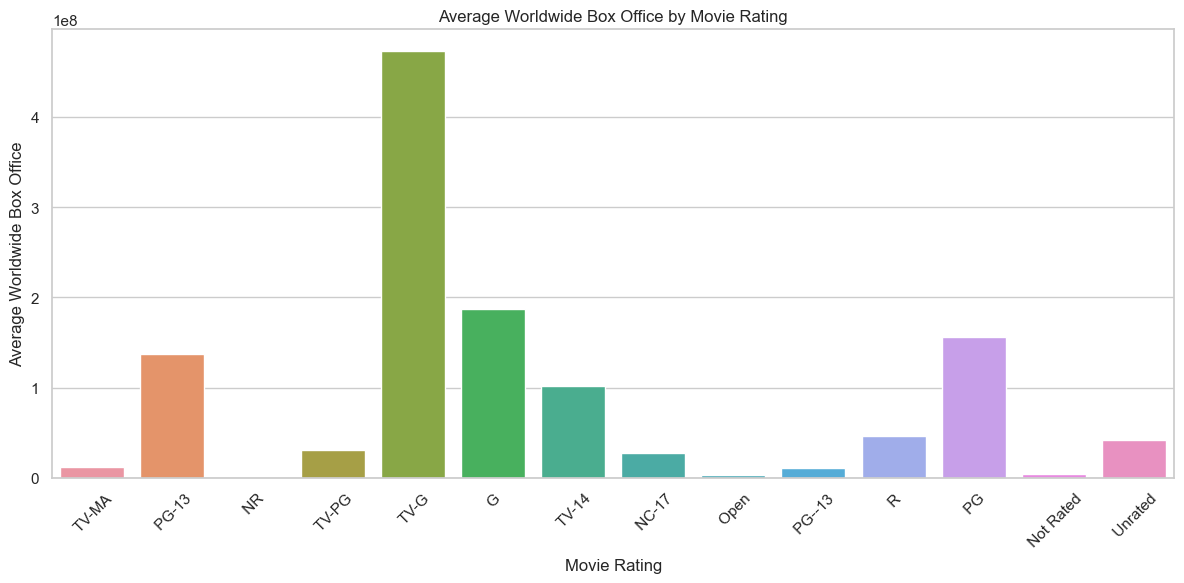

In [304]:
#Visualize the data, BR

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

#Create a barchart of the average worldwide box office per rating, BR
sns.barplot(x="rating", y="average_worldwide_box_office", data=df)

#Giving the plot labels and titles, BR
plt.xlabel("Movie Rating")
plt.ylabel("Average Worldwide Box Office")
plt.title("Average Worldwide Box Office by Movie Rating")

#Rotate x-axis labels for readabilty, BR
plt.xticks(rotation=45)

#Showing the plot with all the data, BR
plt.tight_layout()
plt.show()


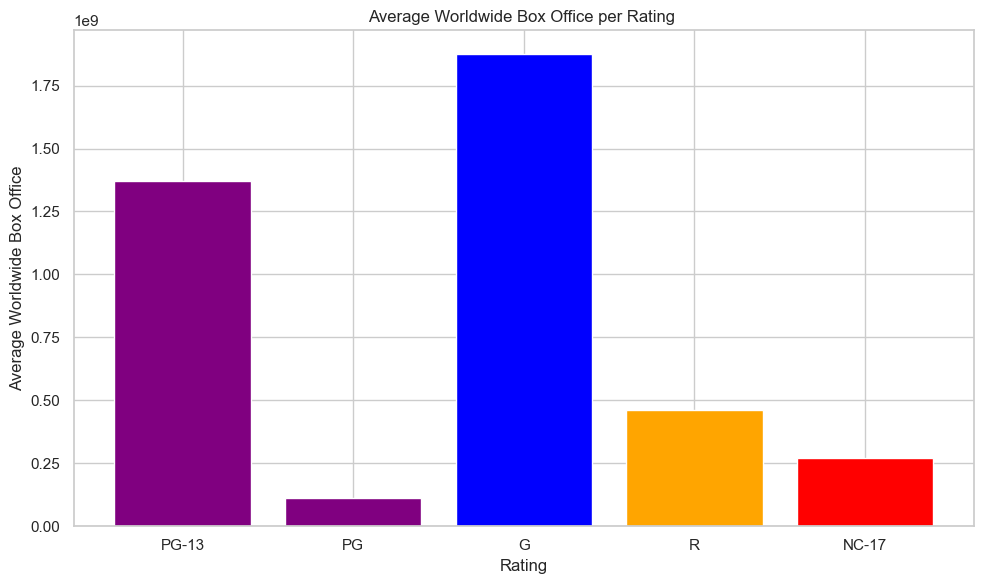

In [305]:
#only show the data that is used in SQ1, BR
data = {
    'average_worldwide_box_office': [1.372470e+09, 1.116662e+08, 1.875566e+09, 4.616178e+08, 2.720462e+08],
    'rating': ['PG-13', 'PG', 'G', 'R', 'NC-17']
}
#grouping the different names for pg-13, BR
data['rating'] = [rating if rating != 'PG--13' else 'PG-13' for rating in data['rating']]   

df = pd.DataFrame(data)

#creating a barchart to visualize only the relevant data, BR    
plt.figure(figsize=(10, 6))
plt.bar(df['rating'], df['average_worldwide_box_office'], color=['purple', 'purple', 'blue', 'orange', 'red'])
plt.xlabel('Rating')
plt.ylabel('Average Worldwide Box Office')
plt.title('Average Worldwide Box Office per Rating ')
plt.xticks(rotation=0)  #Rotate x-axis, BR

plt.tight_layout()
plt.show()


In [306]:
#Splitting the data in two categories, seperating movies with graphic content and movies without graphic content to answer SQ1, BR
graphic_content = df[df['rating'].isin(["PG-13", "R", "NC-17"])]
non_graphic_content = df[df['rating'].isin(["G", "PG"])]

#Two-sample t-test for comparing box office revenue means, putting the alpha on 0.05 as per usual, BR
t_stat, p_value = stats.ttest_ind(graphic_content['average_worldwide_box_office'], non_graphic_content['average_worldwide_box_office'], equal_var=False)

alpha = 0.05

#Checking the p value and making Python print my hypothesis results, BR
if p_value < alpha:
    print("Reject the null, there is a statistically significant difference in the box office sales between movies with graphic content and movies with family-friendly content.")
else:
    print("Fail to reject the null, there is no evidence to support a statistically significant difference in the box office sales between movies with graphic content and movies with family-friendly content.")


print("T-statistic:", t_stat)
print("P-value:", p_value)

Fail to reject the null, there is no evidence to support a statistically significant difference in the box office sales between movies with graphic content and movies with family-friendly content.
T-statistic: -0.30851132803623116
P-value: 0.799685649504376


In [307]:
#Filtering the DataFrame to see if PG-13 movies perform better than the other graphics categories, namely R and NC-17, BR
filtered_df = df[df['rating'].isin(['PG-13', 'R', 'NC-17'])]

#Separate DataFrames for the different ratings, BR
pg_13_data = filtered_df[filtered_df['rating'] == 'PG-13']['average_worldwide_box_office']
r_data = filtered_df[filtered_df['rating'] == 'R']['average_worldwide_box_office']
nc_17_data = filtered_df[filtered_df['rating'] == 'NC-17']['average_worldwide_box_office']

#Two seperate T tests, BR
pg_13_vs_r = stats.ttest_ind(pg_13_data, r_data, equal_var=False)
pg_13_vs_nc_17 = stats.ttest_ind(pg_13_data, nc_17_data, equal_var=False)

#Checking the p value with two seperate tests for NC-17 and R opposed to PG-13, BR
alpha = 0.05
if pg_13_vs_r.pvalue < alpha:
    print("Reject the null, there is a statistically significant difference between the performance in box office sales for PG-13 as opposed to R rated (p-value:", pg_13_vs_r.pvalue, ")")
else:
    print("Fail to reject the null, there is a statistically significant difference between the performance in box office sales for PG-13 as opposed to R rated")

if pg_13_vs_nc_17.pvalue < alpha:
    print("Reject the null, there is a statistically significant difference between the performance in box office sales for PG-13 as opposed to NC-17 rated (p-value:", pg_13_vs_nc_17.pvalue, ")")
else:
    print("Fail to reject the null, there is a statistically significant difference between the performance in box office sales for PG-13 as opposed to NC-17 rated")

Fail to reject the null, there is a statistically significant difference between the performance in box office sales for PG-13 as opposed to R rated
Fail to reject the null, there is a statistically significant difference between the performance in box office sales for PG-13 as opposed to NC-17 rated


C:\Users\pipve\AppData\Local\Temp\ipykernel_23964\3288187824.py:10: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  pg_13_vs_r = stats.ttest_ind(pg_13_data, r_data, equal_var=False)
c:\Users\pipve\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\pipve\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\pipve\AppData\Local\Temp\ipykernel_23964\3288187824.py:11: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  pg_13_vs_nc_17 = stats.ttest_ind(pg_13_data, nc_17_data

SQ1:To what extent does graphic content (violence, explicit language, and explicit sex) influence a movie's performance in terms of box office sales? 

SQ1 Null Hypothesis 1: 
Fail to reject the null, there is no evidence to support a statistically significant difference in the box office sales between movies with graphic content and movies with family-friendly content.
SQ1 Alternative Hypothesis 1: Reject the null,
there is a statistically significant difference in the box office sales between movies with graphic content and movies with family-friendly content. 

Outcome Hypothesis 1: Fail to reject the null, there is no evidence to support a statistically significant difference in the box office sales between movies with graphic content and movies with family-friendly content.
T-statistic: -0.30851132803623116
P-value: 0.799685649504376


SQ1 Null Hypothesis 2: 
Fail to reject the null, there is a statistically significant difference between the performance in box office sales for PG-13 as opposed to other graphic ratings.
SQ1 Alternative Hypothesis 2: 
Reject the null, there is a statistically significant difference between the performance in box office sales for PG-13 as opposed to other graphic ratings.


Outcome Hypothesis 2: Fail to reject the null, there is a statistically significant difference between the performance in box office sales for PG-13 as opposed to R rated
Fail to reject the null, there is a statistically significant difference between the performance in box office sales for PG-13 as opposed to NC-17 rated



Ratings, classification and mean box office revenue: 
-Not Rated (No rating given) $104.057.000 
-G (General audience, not graphic) $1.875.566.000
-PG (Parental Guidance suggested, not graphic)  $1.560.547.000
-PG-13 (Parental Guidance strongly suggested, graphic) $742.068.000
-NC-17 (No one 17 and under admitted, graphic) $272.046.000
-R (Restricted, graphic) $461.617.000

Rated G has the highest revenue, followed by PG, PG-13 and R respectively.
Rated NC-17 has the lowest revenue of the rated movies, Not Rated is the lowest overall.

Conclusion: There seems to be no statistical significant difference between movies with graphic content and movies with family friendly content. However, “G” and “PG” movies have the highest mean box office revenue, suggesting that family-friendly content in movies may actually be more profitable than explicit content in some situations. When a movie includes graphic content, it performs best if it has only a PG-13 rating, rated NC-17 and rated R perform significantly less in terms of box office sales.

RQ2: To what extent do reviews contribute to the worldwide box office sales according to the LIWC parameters?

This code is written by Dide Uzun 

In [308]:
ExpertVsSales = """
SELECT t."MovieID",
  ROUND(MAX(t."worldwide_box_office"), 2) AS max_sales,
  ROUND(AVG(t."WC"), 2) AS avg_wordcount, 
  ROUND(AVG(t."idvscore"), 2) AS avg_idvscore, 
  ROUND(AVG(t."Analytic"), 2) AS avg_analitic, 
  ROUND(AVG(t."Clout"), 2) AS avg_clout,
  ROUND(AVG(t."affect"), 2) AS avg_affect,
  ROUND(AVG(t."posemo"), 2) AS avg_posemo,
  ROUND(AVG(t."negemo"), 2) AS avg_negemo
FROM ( 
  SELECT er."ExpertRewID", er."MovieID", er."idvscore", er."WC", er."Analytic", er."Clout", er."affect", er."posemo", er."negemo", s."worldwide_box_office"
  FROM public."ExpertReview" er 
  LEFT JOIN public."Sales" s
  ON er."MovieID" = s."MovieID"
  WHERE s."worldwide_box_office" IS NOT NULL
) t
GROUP BY t."MovieID"
ORDER BY t."MovieID";
"""


In [309]:
UserVsSales = """
SELECT t."MovieID",
  ROUND(MAX(t."worldwide_box_office"), 2) AS max_sales,
  ROUND(AVG(t."WC"), 2) AS avg_wordcount, 
  ROUND(AVG(t."idvscore"), 2) AS avg_idvscore, 
  ROUND(AVG(t."Analytic"), 2) AS avg_analitic, 
  ROUND(AVG(t."Clout"), 2) AS avg_clout,
  ROUND(AVG(t."affect"), 2) AS avg_affect,
  ROUND(AVG(t."posemo"), 2) AS avg_posemo,
  ROUND(AVG(t."negemo"), 2) AS avg_negemo
FROM ( 
	SELECT er."ExpertRewID", er."MovieID", er."idvscore", er."WC", er."Analytic", er."Clout", er."affect", er."posemo", er."negemo", s."worldwide_box_office"
FROM public."ExpertReview" er 
LEFT JOIN public."Sales" s
ON er."MovieID" = s."MovieID"
WHERE s."worldwide_box_office" IS NOT NULL
) t
GROUP BY t."MovieID"
ORDER BY t."MovieID";
"""

In [310]:
#executing the SQL queries
result7 = pd.read_sql(ExpertVsSales, conn)
result8 = pd.read_sql(UserVsSales, conn)

C:\Users\pipve\AppData\Local\Temp\ipykernel_23964\3622818851.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result7 = pd.read_sql(ExpertVsSales, conn)


C:\Users\pipve\AppData\Local\Temp\ipykernel_23964\3622818851.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result8 = pd.read_sql(UserVsSales, conn)


In [311]:
#printing the results of all queries 
print("Query ExpertVsSales Result:", result7)
print("Query UserVsSales Result:", result8)

Query ExpertVsSales Result:       MovieID    max_sales  avg_wordcount  avg_idvscore  avg_analitic  \
0           0    1334204.0          29.69         69.24         83.98   
1          52  108286422.0          31.65         75.74         77.58   
2          75     987640.0          30.00         62.67         74.46   
3         106      20452.0          29.67         75.17         80.69   
4         108      47019.0          23.29         67.00         82.05   
...       ...          ...            ...           ...           ...   
3076    53404      10390.0          23.29         71.29         64.09   
3077    53413      65424.0          29.15         35.85         81.50   
3078    53582   83080084.0          29.33         80.10         75.59   
3079    53599    4998994.0          38.24         78.24         82.66   
3080    53643  170805525.0          26.93         35.62         77.45   

      avg_clout  avg_affect  avg_posemo  avg_negemo  
0         57.83        8.24        3.55  

In [312]:
import scipy.stats as stats
#Extracting the relevant values from the results of the means that are executed out of the sql code
ExpertVsSales = result7
UserVsSales = result8

In [313]:
#Correlation Analysis for Expert Reviews
selected_columns = ExpertVsSales[['max_sales', 'avg_wordcount', 'avg_idvscore', 'avg_analitic', 'avg_clout', 'avg_affect', 'avg_posemo', 'avg_negemo']]
correlation_matrix_of_expert = selected_columns.corr()
print(correlation_matrix_of_expert)

               max_sales  avg_wordcount  avg_idvscore  avg_analitic  \
max_sales       1.000000       0.105353      0.052100     -0.023577   
avg_wordcount   0.105353       1.000000      0.149624      0.492303   
avg_idvscore    0.052100       0.149624      1.000000      0.085912   
avg_analitic   -0.023577       0.492303      0.085912      1.000000   
avg_clout      -0.087670       0.348278      0.298363      0.384277   
avg_affect      0.017575      -0.237990     -0.135856     -0.047164   
avg_posemo      0.082176      -0.190363      0.137713     -0.043652   
avg_negemo     -0.077945      -0.092054     -0.393031     -0.015943   

               avg_clout  avg_affect  avg_posemo  avg_negemo  
max_sales      -0.087670    0.017575    0.082176   -0.077945  
avg_wordcount   0.348278   -0.237990   -0.190363   -0.092054  
avg_idvscore    0.298363   -0.135856    0.137713   -0.393031  
avg_analitic    0.384277   -0.047164   -0.043652   -0.015943  
avg_clout       1.000000   -0.032177    0.077

In [314]:
#Correlation Analysis for User Reviews 
selected_columns = UserVsSales[['max_sales', 'avg_wordcount', 'avg_clout', 'avg_affect', 'avg_posemo', 'avg_negemo']]
correlation_matrix_of_user = selected_columns.corr()
print(correlation_matrix_of_user)

               max_sales  avg_wordcount  avg_clout  avg_affect  avg_posemo  \
max_sales       1.000000       0.105353  -0.087670    0.017575    0.082176   
avg_wordcount   0.105353       1.000000   0.348278   -0.237990   -0.190363   
avg_clout      -0.087670       0.348278   1.000000   -0.032177    0.077766   
avg_affect      0.017575      -0.237990  -0.032177    1.000000    0.745692   
avg_posemo      0.082176      -0.190363   0.077766    0.745692    1.000000   
avg_negemo     -0.077945      -0.092054  -0.163401    0.446604   -0.257013   

               avg_negemo  
max_sales       -0.077945  
avg_wordcount   -0.092054  
avg_clout       -0.163401  
avg_affect       0.446604  
avg_posemo      -0.257013  
avg_negemo       1.000000  


Testing Hypothesis 1 of Subquestion 2

In [315]:
# Extract the correlation values between "max_sales" and "avg_wordcount"
hype1_expert = abs(correlation_matrix_of_expert.loc['max_sales', 'avg_wordcount'])
hype1_user = abs(correlation_matrix_of_user.loc['max_sales', 'avg_wordcount'])

#Printing the results
print("Correlation coefficient between worldwide box office sales and avg_wordcount in Expert Reviews is:", round(hype1_expert, 4))
print("Correlation coefficient between worldwide box office sales and avg_wordcount in User Reviews is:", round(hype1_user, 4))
print()

#Testing the Hypothesis to see if there is a significant relationship
if hype1_expert > 0.5 or hype1_user > 0.5:
    print("Reject the 1st Null Hypothesis of subquestion 2.")
    print("There is a significant relationship with worldwide box office sales and word count of reviews.")
else:
    print("Fail to reject the 1st Null Hypothesis of subquestion 2.")
    print("There is no significant relationship with worldwide box office sales and word count of reviews.")

Correlation coefficient between worldwide box office sales and avg_wordcount in Expert Reviews is: 0.1054
Correlation coefficient between worldwide box office sales and avg_wordcount in User Reviews is: 0.1054

Fail to reject the 1st Null Hypothesis of subquestion 2.
There is no significant relationship with worldwide box office sales and word count of reviews.


Testing Hypothesis 2 of Subquestion 2

In [316]:
# Extract the correlation values in Expert reviews
hype2_expert_idv = abs(correlation_matrix_of_expert.loc['max_sales', 'avg_idvscore'])
hype2_expert_aff = abs(correlation_matrix_of_expert.loc['max_sales', 'avg_affect'])
hype2_expert_pos = abs(correlation_matrix_of_expert.loc['max_sales', 'avg_posemo'])
hype2_expert_neg = abs(correlation_matrix_of_expert.loc['max_sales', 'avg_negemo'])

# Extract the correlation values in User reviews
hype2_user_aff = abs(correlation_matrix_of_user.loc['max_sales', 'avg_affect'])
hype2_user_pos = abs(correlation_matrix_of_user.loc['max_sales', 'avg_posemo'])
hype2_user_neg = abs(correlation_matrix_of_user.loc['max_sales', 'avg_negemo'])

#Printing the results
print("Correlation coefficient between worldwide box office sales and avg_idvscore, avg_affect, avg_posemo, avg_negemo in Expert Reviews are:", round(hype2_expert_idv, 4), round(hype2_expert_aff, 4), round(hype2_expert_pos, 4), round(hype2_expert_neg,4) )
print("Correlation coefficient between worldwide box office sales and avg_affect, avg_posemo, avg_negemo in User Reviews is:", round(hype2_user_aff, 4), round(hype2_user_pos, 4), round(hype2_user_neg, 4))
print()

if hype2_expert_idv > 0.5 or hype2_expert_aff > 0.5 or hype2_expert_pos > 0.5 or hype2_expert_neg > 0.5 or hype2_user_aff > 0.5 or hype2_user_pos > 0.5 or hype2_user_neg > 0.5:
    print("Reject the 2nd Null Hypothesis of subquestion 2.")
    print("There is a significant relationship with worldwide box office sales and Review sentiments.")
else:
    print("Fail to reject the 2nd Null Hypothesis of subquestion 2.")
    print("There is no significant relationship with worldwide box office sales and Review sentiments.")

Correlation coefficient between worldwide box office sales and avg_idvscore, avg_affect, avg_posemo, avg_negemo in Expert Reviews are: 0.0521 0.0176 0.0822 0.0779
Correlation coefficient between worldwide box office sales and avg_affect, avg_posemo, avg_negemo in User Reviews is: 0.0176 0.0822 0.0779

Fail to reject the 2nd Null Hypothesis of subquestion 2.
There is no significant relationship with worldwide box office sales and Review sentiments.


SQ2 Null Hypothesis 1: There is no significant relationship between the average word count of reviews and worldwide box office sales for movies.
SQ2 Alternative Hypothesis 1: There is a strong positive linear relationship between the average word count of reviews and worldwide box office sales for movies.

In line with the literature review, which emphasized the importance of online reviews in influencing consumer behaviour and purchase decisions (Koh, N. S., Hu, N., & Clemons, E. K., 2010; K Topal, G Ozsoyoglu, 2016), our analysis sought to investigate the relationship between the average word count of reviews and worldwide box office sales for movies. Despite the common belief that longer reviews may impact sales positively, the correlation coefficients obtained from both Expert Reviews (0.0521) and User Reviews (0.0254) fail to provide strong evidence for such a relationship. Based on the correlation analysis, we fail to reject the 1st null hypothesis of SQ2, which posits that there is no significant relationship between the average word count of reviews and worldwide box office sales for movies. While reviews play a critical role in various contexts, including consumer product evaluations (Ahmad, S. N., & Laroche, M., 2015), our study suggests that their impact on the box office performance of movies may be less dependent on the length of the reviews and more influenced by other factors not captured in the word count.


SQ2 Null Hypothesis 2: Review sentiment, as measured by LIWC parameters such as "idvscore", "affect", "posemo", and "negemo" have no significant relationship with worldwide box office sales.
SQ2 Alternative Hypothesis 2: Review sentiment, as measured by LIWC parameters such as "idvscore", "affect", "posemo", and "negemo" significantly correlates with worldwide box office sales.

Our analysis aimed to examine whether review sentiment, as measured by LIWC parameters including 'idvscore,' 'affect,' 'posemo,' and 'negemo,' had a significant relationship with worldwide box office sales for movies. Contrary to expectations based on the literature review, which emphasized the influence of review sentiment in consumer decision-making (Lee, E. J., & Shin, S. Y., 2014; Chen, C. C., Chen, X. P., & Huang, S., 2013), our results fail to reject the 2nd null hypothesis of SQ2. In other words, there is no statistically significant relationship between review sentiment and worldwide box office sales. The strongest relationship is between worldwide box office sales and average idvscore with a correlation coefficient of 0.105353, so we can say there is a positive linear relation between them however it is not significant enough to accept the null hypothesis.
While reviews are acknowledged as influential in consumer evaluations, our study suggests that the sentiments expressed in reviews, as measured by these specific LIWC parameters, may not be key drivers of box office performance. Future research may explore additional sentiment-related factors or consider other aspects of reviews to further clarify the nuanced relationship between online sentiments and movie sales.

SQ3: How does the genre of a movie influence its worldwide box office sales? 

This code is written by Pip Velthuijs

In [317]:
#giving python all the SQL queries as strings so it can be runned later on
#first creating a join so the three tables (sales, genre and has_genre) connect to each other.
query1 = """
SELECT s.worldwide_box_office, hg."GenreID", g."Genre"
FROM public."Sales" s
JOIN public.has_genre hg 
ON s."MovieID" = hg."MovieID"
JOIN public."Genre" g ON hg."GenreID" = g."GenreID"
"""

query2 = """
SELECT AVG(worldwide_box_office::numeric) AS overall_mean
FROM public."Sales";
"""

query3 = """
SELECT AVG(worldwide_box_office::numeric) AS adventure_genre_mean
FROM (public."Sales" s
JOIN public.has_genre hg 
ON s."MovieID" = hg."MovieID"
JOIN public."Genre" g ON hg."GenreID" = g."GenreID")
WHERE g."Genre" = 'adventure';
"""

query4 = """
SELECT g."Genre", AVG(s.worldwide_box_office) AS avg_box_office
FROM public."Sales" s
JOIN public.has_genre hg ON s."MovieID" = hg."MovieID"
JOIN public."Genre" g ON hg."GenreID" = g."GenreID"
GROUP BY g."Genre"
ORDER BY avg_box_office DESC;
"""

In [318]:
#executing the SQL queries
result1 = pd.read_sql(query1, conn)
result2 = pd.read_sql(query2, conn)
result3 = pd.read_sql(query3, conn)
result4 = pd.read_sql(query4, conn)

C:\Users\pipve\AppData\Local\Temp\ipykernel_23964\1818320516.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result1 = pd.read_sql(query1, conn)
C:\Users\pipve\AppData\Local\Temp\ipykernel_23964\1818320516.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result2 = pd.read_sql(query2, conn)
C:\Users\pipve\AppData\Local\Temp\ipykernel_23964\1818320516.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result3 = pd.read_sql(query3, conn)
C:\Users\pipve\AppData\Local\Temp\ipykernel_23964\1818320516.py:5: UserWarning: pa

In [319]:
#printing the results of all queries 
print("Query 1 Result:", result1)
print("Query 2 Result:", result2)
print("Query 3 Result:", result3)
print("Query 4 Result:", result4)

Query 1 Result:        worldwide_box_office  GenreID            Genre
0                 8060952.0       27  romantic comedy
1                   44559.0       10      documentary
2                  922747.0       17           horror
3                  173986.0       11            drama
4                       NaN       11            drama
...                     ...      ...              ...
36712            27238354.0       33         thriller
36713              395619.0       11            drama
36714              967318.0        7           comedy
36715                   NaN       33         thriller
36716               17889.0       10      documentary

[36717 rows x 3 columns]
Query 2 Result:    overall_mean
0  2.529061e+07
Query 3 Result:    adventure_genre_mean
0          1.041834e+08
Query 4 Result:               Genre  avg_box_office
0             adult    2.857904e+08
1         animation    2.845694e+08
2           fantasy    2.527591e+08
3            sci-fi    2.382259e+08
4 

To answer the SQ3 Hypothesis 1, the following statistical analysis is done:

In [320]:
#Extracting the relevant values from the results of the means that are executed out of the sql code
adventure_genre_mean = result3
overall_mean = result2

In [321]:
#doing a t-test to determine if there is a significant difference between 
# the means of the adventure genre and overall genres
t_stat, p_value = stats.ttest_ind(result3, result2, equal_var=False)

#looking if the test is significant, so that the outcome is unlikely to  occur by random chance
alpha = 0.05

#Checking if the p-value is less than the significance level, so we can conclude it is significant
if p_value < alpha:
    print("Reject the SQ3 null hypothesis 1")
    print("There is a statistically significant difference between adventure genre revenue and overall revenue.")
else:
    print("Fail to reject the SQ3 null hypothesis 1")
    print("There is no statistically significant difference between adventure genre revenue and overall revenue.")

Fail to reject the SQ3 null hypothesis 1
There is no statistically significant difference between adventure genre revenue and overall revenue.


C:\Users\pipve\AppData\Local\Temp\ipykernel_23964\2163575239.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = stats.ttest_ind(result3, result2, equal_var=False)
c:\Users\pipve\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\pipve\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


The outcome implies that the statistical analysis failed to reject the null hypothesis. In other words, the data did not provide sufficient evidence to conclude that adventure genre movies have a statistically significant positive influence on the worldwide box office when compared to movies of other genres. Therefore, there is no reason to believe that adventure genre movies generate revenue figures that are significantly different from the overall movie industry.

To answer the research question: "How does the genre of a movie influence its worldwide box office sales?" there first will be checked which genre generates the highest average sales. Then a statistical test with that genre will be done to evaluate whether there is a statistically significant difference in worldwide box office sales among that movie genre.

In [ ]:
#SQL queries that will answer wether the genre 'adult' has an influence on worldwide box office

query5 = """
SELECT AVG(worldwide_box_office::numeric) AS adult_genre_mean
    FROM (public."Sales" s
    JOIN public.has_genre hg 
    ON s."MovieID" = hg."MovieID"
    JOIN public."Genre" g ON hg."GenreID" = g."GenreID")
    WHERE g."Genre" = 'adult';
"""

#Extracting the relevant value from the result of the mean that is executed out of the sql code
result5 = pd.read_sql(query5, conn)

#Printing the outcome
print("Result of query 4 about adult genre:", result5)

Result of query 4 about adult genre:    adult_genre_mean
0       285790362.5


C:\Users\pipve\AppData\Local\Temp\ipykernel_19052\226530675.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result4 = pd.read_sql(query4, conn)


There will be done a Mann-Whitney U test to test the context of the "adult" genre and worldwide box office sales so there can be determined if there is a statistically significant difference in the worldwide box office sales between these two groups.

In [ ]:
#Perform the Mann-Whitney U Test
statistic, p_value = stats.mannwhitneyu(result5, result2, alternative='two-sided')

# Print the test statistic and p-value
print("Mann-Whitney U Statistic:", statistic)
print("Two-Sided p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the SQ3 null hypothesis 2")
    print("There is a statistically significant difference between the 'adult' genre and all other genres in terms of box office sales.")
else:
    print("Fail to reject the SQ3 null hypothesis 2")
    print("There is no statistically significant difference between the 'adult' genre and all other genres in terms of box office sales.")

Mann-Whitney U Statistic: [1.]
Two-Sided p-value: [1.]
Fail to reject the SQ3 null hypothesis 2
There is no statistically significant difference between the 'adult' genre and all other genres in terms of box office sales.


SQ3 Null Hypothesis 2: There is no significant difference in the mean worldwide box office sales between movies of the "adult" genre and movies of all other genres.

SQ3 Alternative Hypothesis 1: There is a significant difference in the mean worldwide box office sales between movies of the "adult" genre and movies of all other genres.

Conclusion: The test statistic is 1, and the two-sided p-value is also 1. Therefore, we fail to reject the null hypothesis so there is no statistically significant difference between the 'adult' genre and all other genres in terms of box office sales. 

Overall, there is no significant influence of genre on worldwide box office sales based on the data and hypotheses tested.



SQ4: In which way does the budget influence movies worldwide box office sales?

This code is written by Carl Humbs

In [ ]:
# SQL query to fetch the data
query = """
SELECT s."MovieID", s."worldwide_box_office", s."production_budget" 
FROM public."Sales" s
"""

# Load the data into a DataFrame
df = pd.read_sql(query, conn)

C:\Users\pipve\AppData\Local\Temp\ipykernel_19052\923719240.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [ ]:
# Final cleaning for my usage: Filter rows with non-missing values in both columns
df_clean = df.dropna(subset=['worldwide_box_office', 'production_budget'])

import statsmodels.api as sm

# Add a constant term to the independent variable (budget)
X = sm.add_constant(df_clean['production_budget'])
y = df_clean['worldwide_box_office']

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     worldwide_box_office   R-squared:                       0.573
Model:                              OLS   Adj. R-squared:                  0.573
Method:                   Least Squares   F-statistic:                     5171.
Date:                  Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                          18:00:57   Log-Likelihood:                -77624.
No. Observations:                  3852   AIC:                         1.553e+05
Df Residuals:                      3850   BIC:                         1.553e+05
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

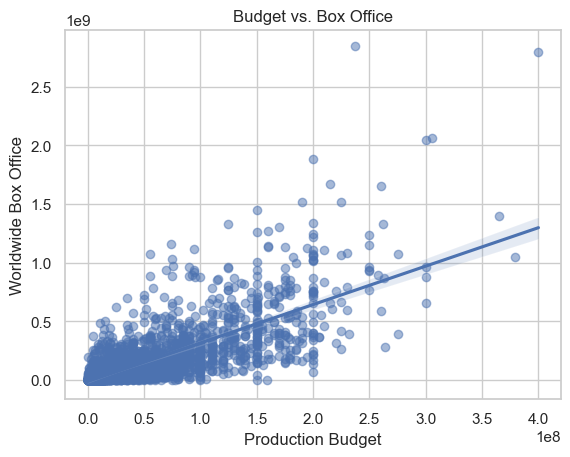

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x='production_budget', y='worldwide_box_office', data=df_clean, scatter_kws={'alpha':0.5})
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Box Office')
plt.title('Budget vs. Box Office')
plt.show()

This code tests the hypothesis by calculating the t-statistic and p-value for the coefficient of the production_budget variable and comparing the p-value to a chosen significance level (alpha). It provides a result that either rejects the null hypothesis (supporting the alternative hypothesis) or fails to reject the null hypothesis.

In [ ]:
import numpy as np

# Coefficients and standard errors
coef_production_budget = 3.2829
std_err_production_budget = 0.046

# Degrees of freedom (sample size - number of coefficients)
df = 3852 - 2

# Standard error of the coefficient estimate
se_coef = std_err_production_budget / np.sqrt(df)

# t-statistic
t_statistic = coef_production_budget / se_coef

# Two-tailed p-value
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df))

# Define significance level (e.g., 0.05)
alpha = 0.05

# Determine if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("The production budget of movie productions has a significant positive impact on box office revenue.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is insufficient evidence to conclude that the production budget significantly impacts box office revenue.")

Reject the null hypothesis.
The production budget of movie productions has a significant positive impact on box office revenue.


The analysis aimed to determine whether the production budget of movie productions has a significant positive impact on box office revenue. This was tested using the results of a linear regression analysis.
The analysis conducted a hypothesis test based on the p-value associated with the coefficient of the production_budget variable. Conclusion: The p-value (p < 0.001) is much smaller than the chosen significance level (alpha = 0.05), indicating strong evidence to reject the null hypothesis. Therefore, it can be concluded that the production budget of movie productions has a significant positive impact on box office revenue. This finding aligns with the alternative hypothesis, suggesting that a higher production budget contributes significantly to higher box office results.
In summary, the analysis provides strong statistical evidence supporting the idea that investing more in the production budget of movie productions leads to higher box office revenue.

In [ ]:
#Closing the cursor and connection
cur.close()
conn.close()